# Dataset Description

The dataset originates from an [IEEE competition](https://www.kaggle.com/competitions/ieee-fraud-detection/data) and was supplied by Vesta Corporation.

In this project we are predicting the probability that an online transaction is fraudulent, as denoted by the binary target *isFraud*.

The data is broken into two files *identity* and *transaction*, which are joined by *TransactionID*. Not all transactions have corresponding identity information.

The dataset comprises 590,540 transactions, of which 20,663 are marked as fraudulent — around 3.5% of the total. The Transactions table includes 394 features, 14 of which are categorical; while the Identity table contains 41 features, with 17 being categorical. 

#### Categorical Features - Transaction
- ProductCD
- card1 - card6
- addr1, addr2
- P_emaildomain
- R_emaildomain
- M1 - M9

#### Categorical Features - Identity
- DeviceType
- DeviceInfo
- id_12 - id_38

The *TransactionDT* feature is a timedelta from a given reference datetime (not an actual timestamp).

#### Files
- **train_{transaction, identity}.csv** - the training set
- **test_{transaction, identity}.csv** - the test set (you must predict the isFraud value for these observations)

#### Transaction File
The transaction file contained features associated with the online transaction and features engineered by Vesta.

|  **Column Name**   | **Description**                                                      |
|--------------------|----------------------------------------------------------------------|
| `TransactionID`    | ID of the transaction. |
| `isFraud`          | The target feature.  '0' representing a non-fraud transaction and '1' represeting a fraud transaction.  |
| `TransactionDT`    | Timedelta from a given reference datetime (not an actual timestamp). |
| `TransactionAMT`   | Transaction payment amount in USD. |
| `ProductCD`        | Product code, the product for each transaction. |
| `card1 – card6`    | Payment card information, such as card type, card category, issue bank, country, and so on. |
| `addr1, addr2`     | Address.  |
| `dist1, dist2`     | Distance. |
| `P/R_emaildomain`  | Purchaser and recipient email domains. |
| `C1 – C14`         | Counting, such as how many addresses are associated with the payment card, and so on. The actual meaning is masked. |
| `D1 – D15`         | Timedelta, such as days between previous transactions, and so on. |
| `M1 – M9`          | Match, such as names on card and address, and so on. |
| `Vxxx`             | Vesta-engineered rich features, including ranking, counting, and other entity relations. |


#### Identity File
The identity file contains identity information: network connection information (IP, ISP, Proxy, and so on) and a digital signature (UA, browser, OS, version, and so on) associated with the credit card transactions.


# Data Loading - Transaction



In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
transaction = pd.read_csv("original_data/train_transaction.csv")

In [4]:
transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Exploratory Data Analysis - Transaction

In [5]:
print("Number of rows and columns in the dataset")
print(transaction.shape)

Number of rows and columns in the dataset
(590540, 394)


In [6]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [7]:
print("Descriptive Statistics of Numerical Variables:")
transaction.describe()

Descriptive Statistics of Numerical Variables:


,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


In [8]:
print("Descriptive Statistics of Categorical Variables:")
transaction.describe(include=['object', 'category'])

Descriptive Statistics of Categorical Variables:


,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9
count,590540,588963,588969,496084,137291,319440,319440,319440,309096,240058,421180,244275,244288,244288
unique,5,4,4,59,60,2,2,2,3,2,2,2,2,2
top,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,F,F,F,T
freq,439670,384767,439938,228355,57147,319415,285468,251731,196405,132491,227856,211374,155251,205656


In [9]:
# Missing values
print(transaction.isnull().sum())

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64


In [10]:
# Get the percentage of fraudulent transactions
fraud_summary = transaction['isFraud'].value_counts().reset_index()
fraud_summary.columns = ['isFraud', 'Count']

fraud_summary['Percent'] = (fraud_summary['Count'] / fraud_summary['Count'].sum()).round(3)

print("Percentage of fraudulent transactions:")
print(fraud_summary.to_string(index=False))

Percentage of fraudulent transactions:
 isFraud  Count  Percent
       0 569877    0.965
       1  20663    0.035


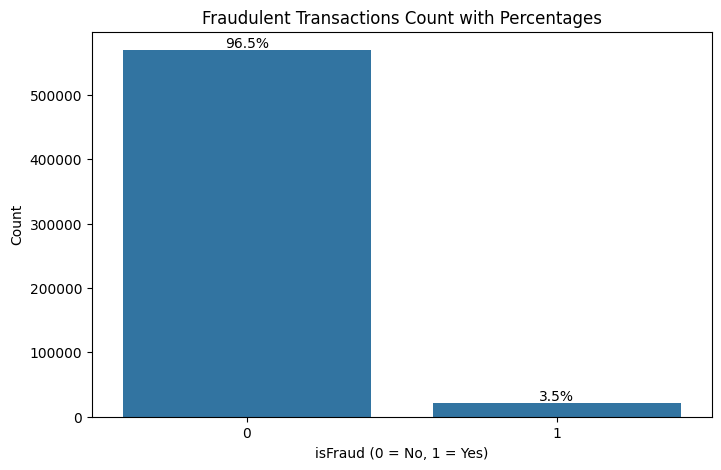

In [11]:
# Plot percentage of fraudulent transactions
plt.figure(figsize=(8,5))
ax = sns.countplot(x='isFraud', data=transaction)

# Calculate percentages and annotate the bars
total = len(transaction)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'  # Calculate percentage
    x = p.get_x() + p.get_width() / 2  # X position for the label
    y = p.get_height()  # Y position for the label
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

# Add title and labels
plt.title('Fraudulent Transactions Count with Percentages')
plt.xlabel('isFraud (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

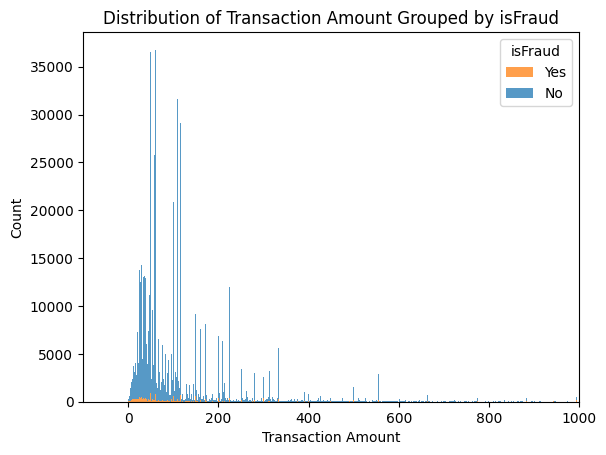

In [12]:
# Plot distribution of transaction amount grouped by isFraud
fig, ax = plt.subplots()
sns.histplot(data=transaction, x='TransactionAmt', hue='isFraud', multiple='stack')
ax.set_xlim(-100,1000)
plt.legend(title="isFraud", labels=["Yes", "No"])
plt.title("Distribution of Transaction Amount Grouped by isFraud")
plt.xlabel('Transaction Amount')
plt.show()

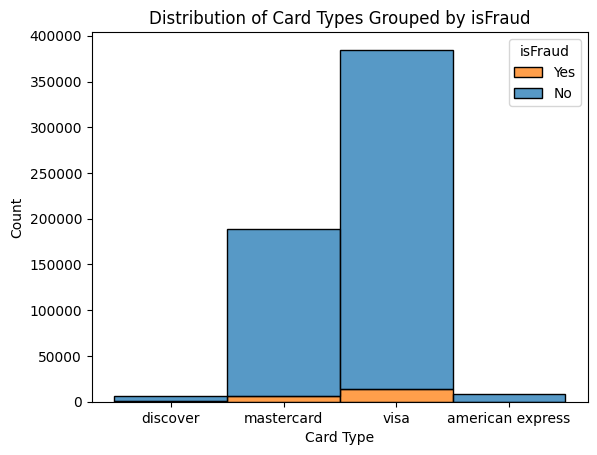

In [13]:
# Plot distribution of card types grouped by isFraud
sns.histplot(data=transaction, x='card4', hue='isFraud', multiple='stack')
plt.legend(title="isFraud", labels=["Yes", "No"])
plt.title("Distribution of Card Types Grouped by isFraud")
plt.xlabel('Card Type')
plt.show()

In [14]:
target_col = 'isFraud' 
num_cols = transaction.select_dtypes(include=['int64', 'float64']).columns.drop(target_col)
cat_cols = transaction.select_dtypes(include=['object', 'category']).columns

In [15]:
# Daytime column
transaction['day'] = np.floor((transaction['TransactionDT'] / (3600 * 24) - 1) % 7)
transaction['hour'] = np.floor(transaction['TransactionDT'] / 3600) % 24

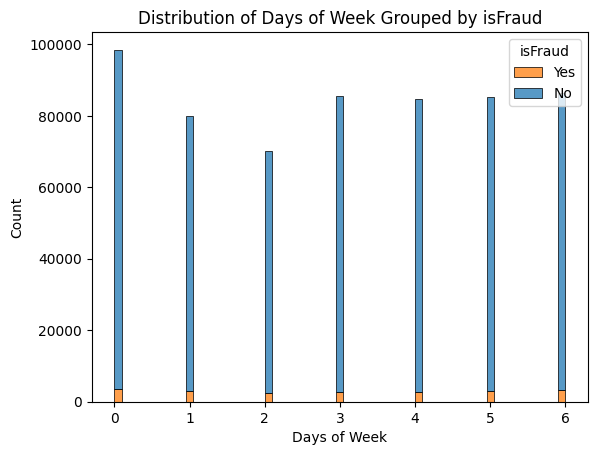

In [16]:
# Plot distribution of days of week grouped by isFraud
sns.histplot(data=transaction, x='day', hue='isFraud', multiple='stack')
plt.legend(title="isFraud", labels=["Yes", "No"])
plt.title("Distribution of Days of Week Grouped by isFraud")
plt.xlabel('Days of Week')
plt.show()

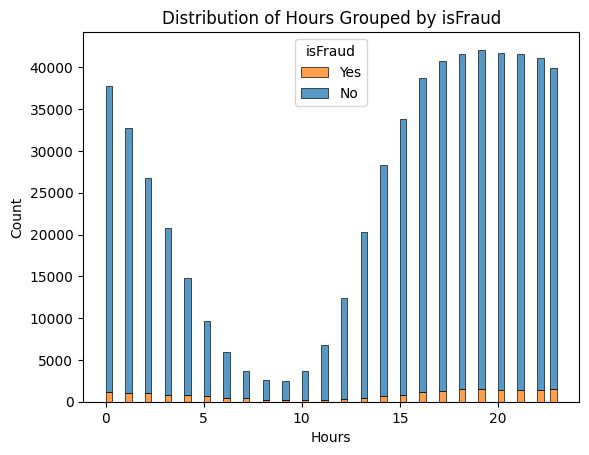

In [17]:
# Plot distribution of hours grouped by isFraud
sns.histplot(data=transaction, x='hour', hue='isFraud', multiple='stack')
plt.legend(title="isFraud", labels=["Yes", "No"])
plt.title("Distribution of Hours Grouped by isFraud")
plt.xlabel('Hours')
plt.show()

#### <span style="color:green; font-weight:bold;"> Insigts: </span>

- The majority of transaction amounts are under $1000, with 75% clustered around $125.

- There are four main credit card types: Visa, Mastercard, Discover, and American Express. Visa and Mastercard dominate large volume of transactions, with Visa usage nearly double that of Mastercard. Fraudulent transactions follow a similar distribution.

- Day of the week and hour of the day appear to have minimal impact on fraudulent transaction patterns.


In [18]:
# Print the names of all numerical columns
print("All numerical columns:")
print(num_cols.tolist())

All numerical columns:
['TransactionID', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97

In [19]:
# Vxxx are Vesta-engineered rich features. Let's skip them for now.
num_cols_part = ['TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15']

In [ ]:
# for testing purpose only, to be removed
df = transaction.sample(frac=0.0001, random_state=42)

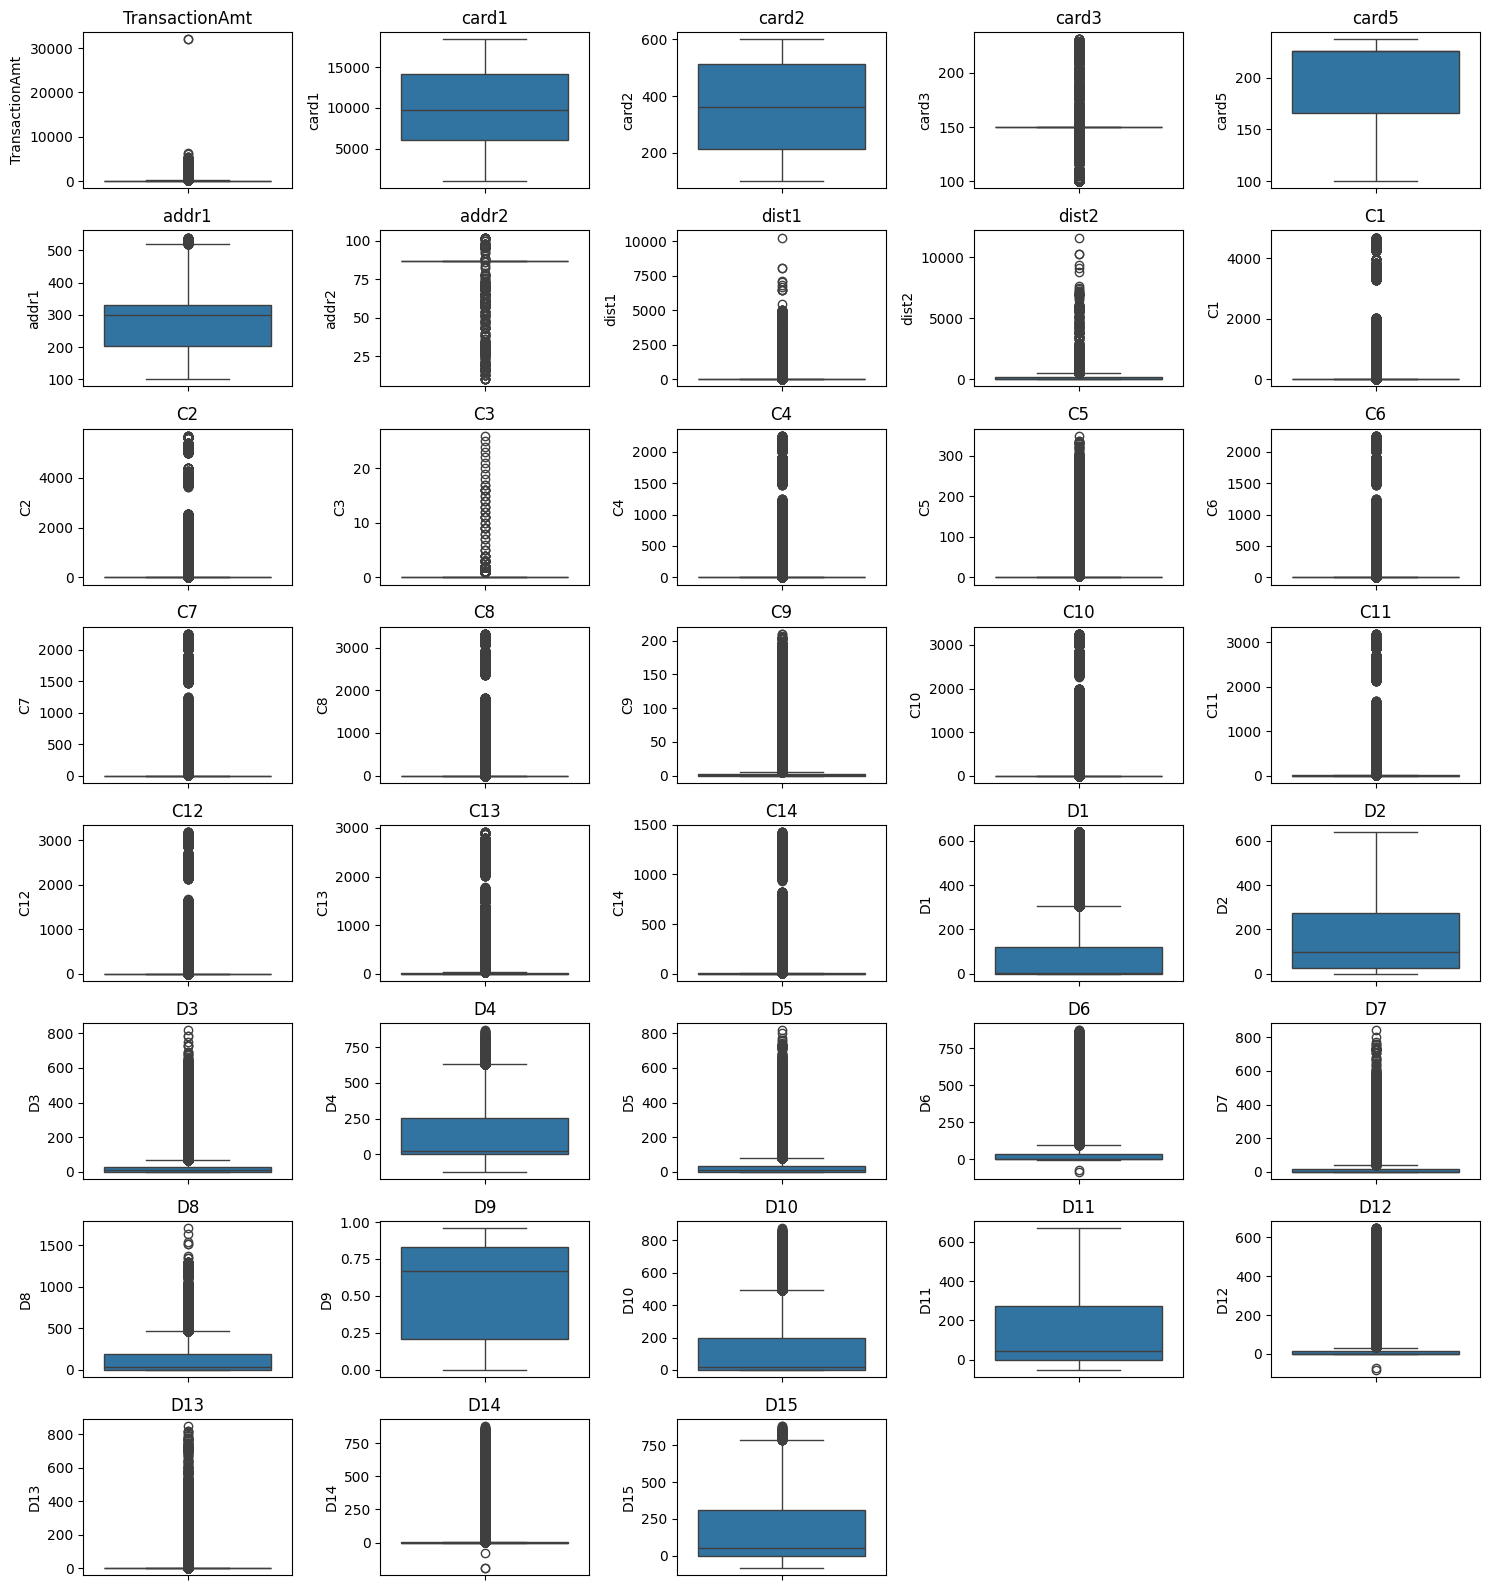

In [46]:
# Use box plots to visualize outliers in numerical features
fig, axes = plt.subplots(8, 5, figsize=(15, 16))
axes = axes.flatten()

for i, col in enumerate(num_cols_part):
    sns.boxplot(data=transaction, y=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')

# Turn off remaining axes
for j in range(len(num_cols_part), len(axes)):
    fig.delaxes(axes[j]) 

plt.tight_layout()
plt.show()

/var/folders/nc/clvsw_cn2752vnp4697zdz8c0000gn/T/ipykernel_1058/2162944829.py:15: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/Users/jungao/AI-Berkeley/solutions-resources/ai-berkely-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


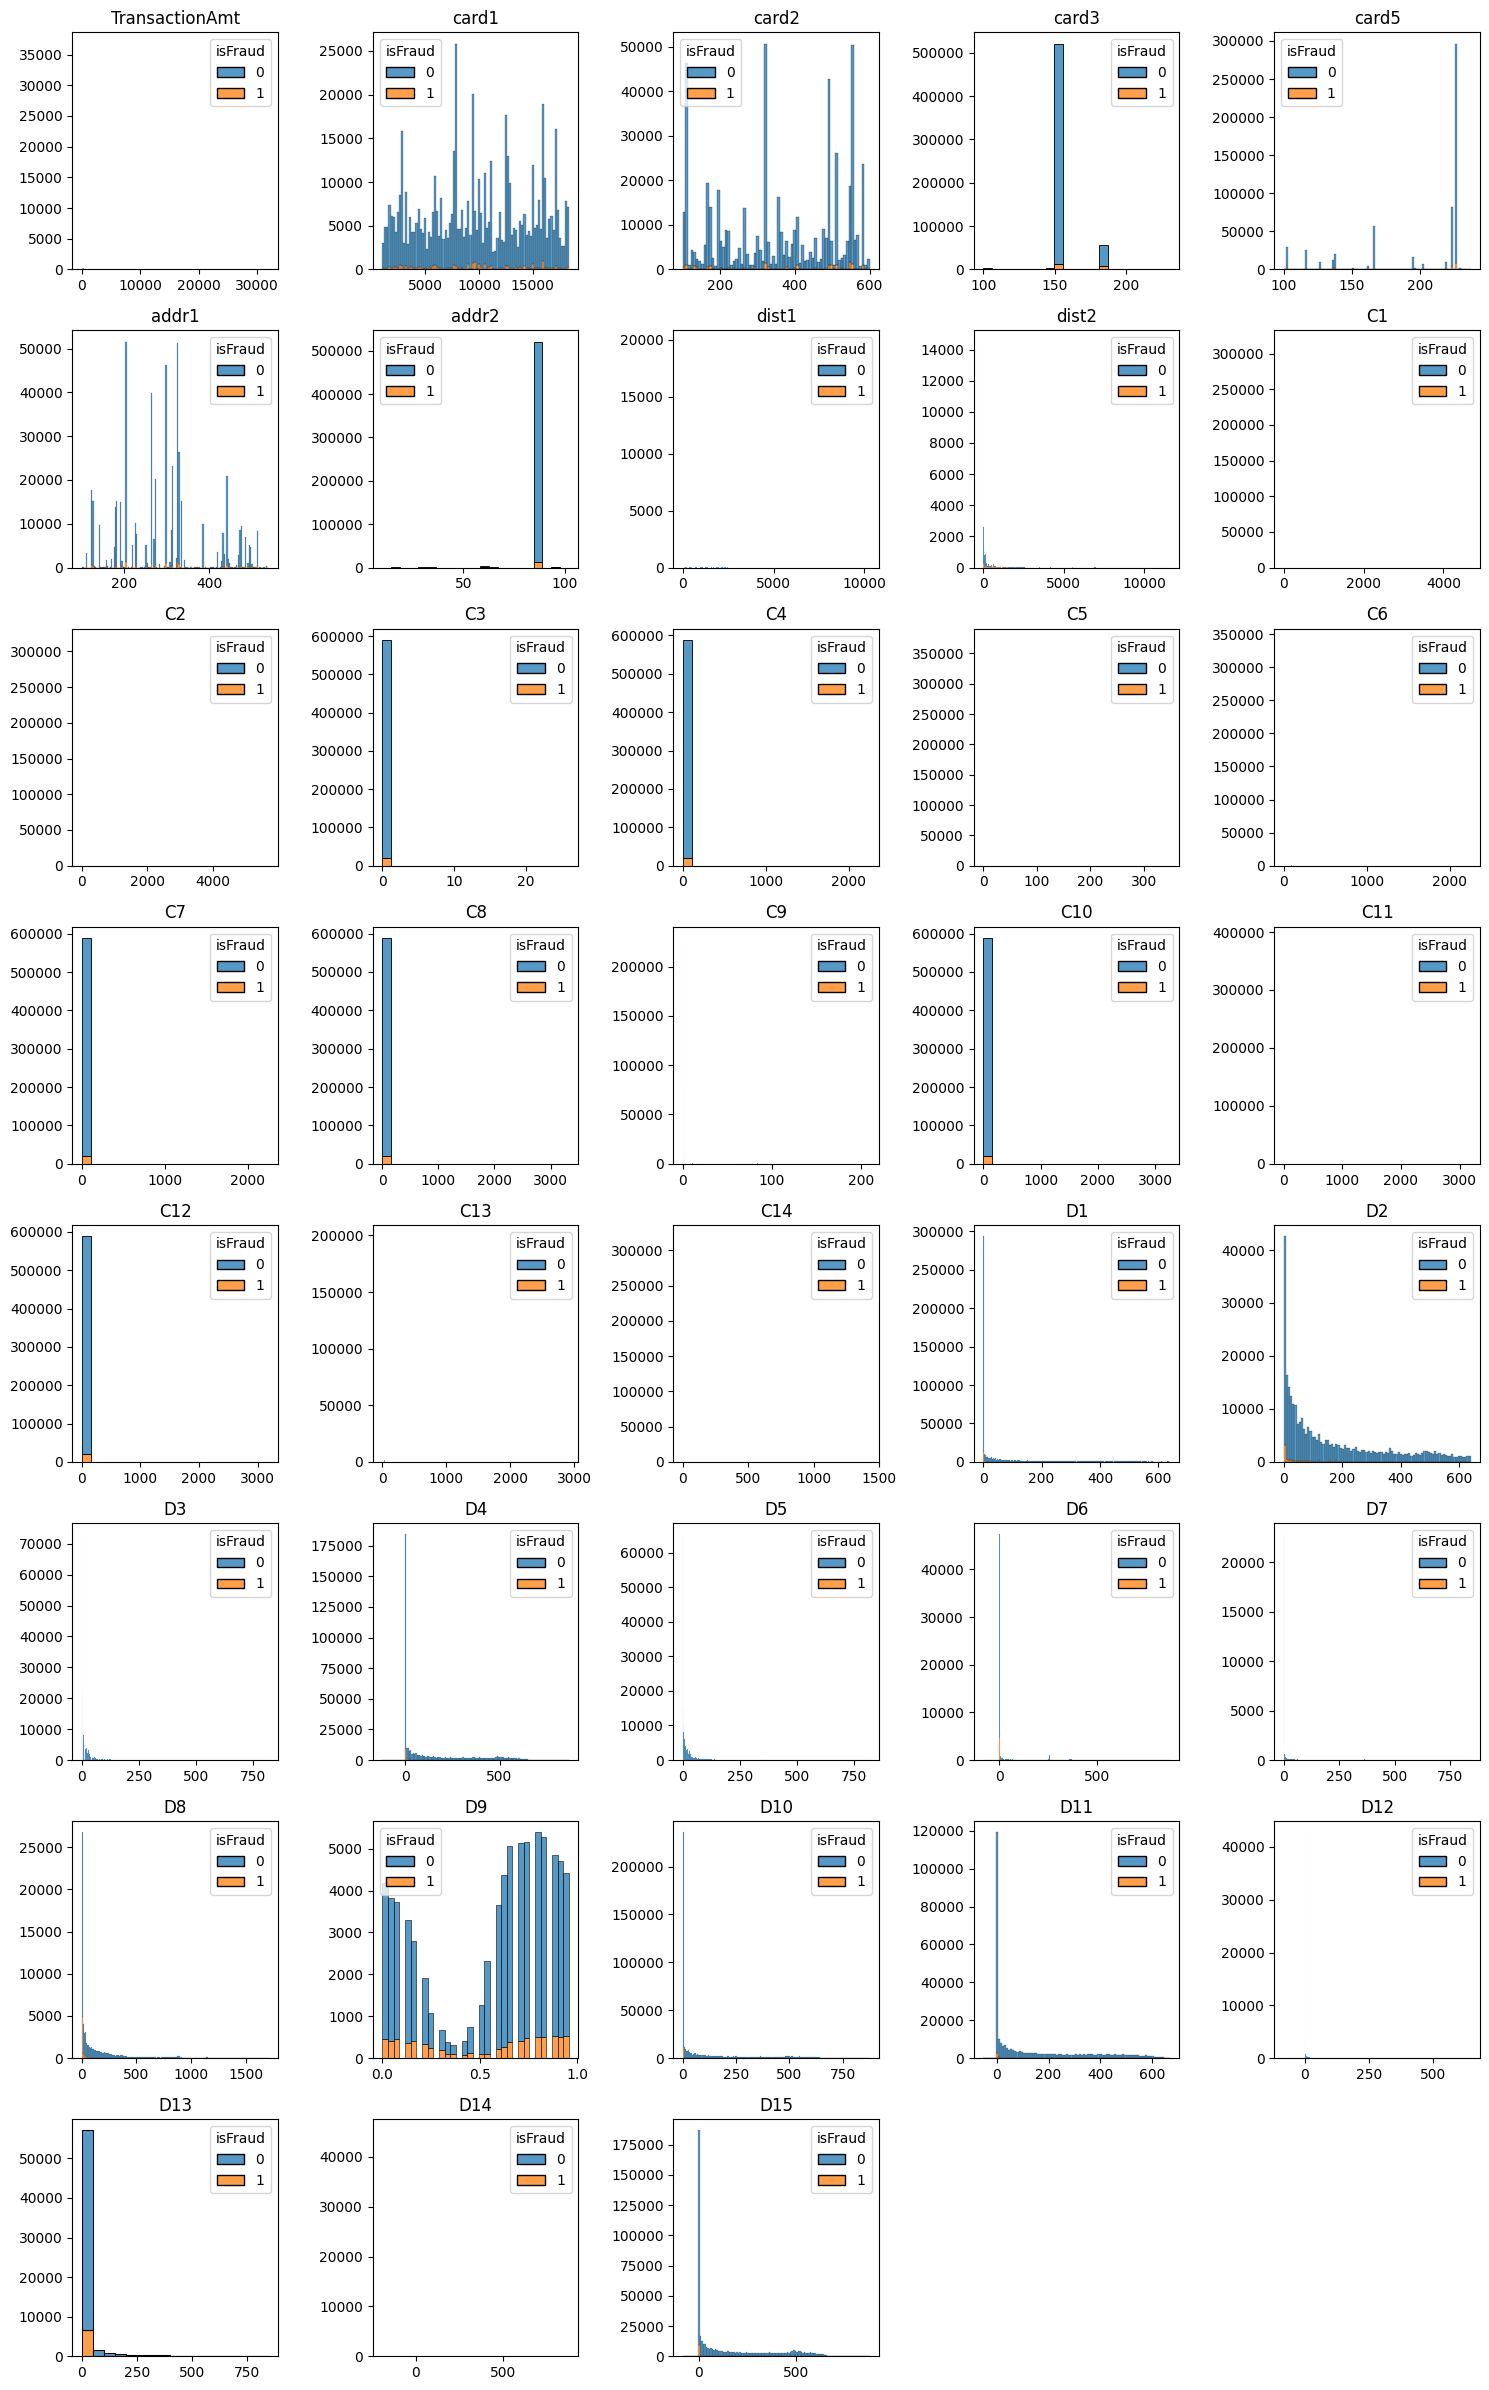

In [48]:
# Distribution of numerical features grouped by isFraud 
fig, axes = plt.subplots(8, 5, figsize=(15, 24))
axes = axes.flatten()

for i, col in enumerate(num_cols_part):
    sns.histplot(data=transaction, x=col, hue = 'isFraud', ax=axes[i], multiple='stack')
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Turn off remaining axes
for j in range(len(num_cols_part), len(axes)):
    fig.delaxes(axes[j]) 

plt.tight_layout()
plt.show()

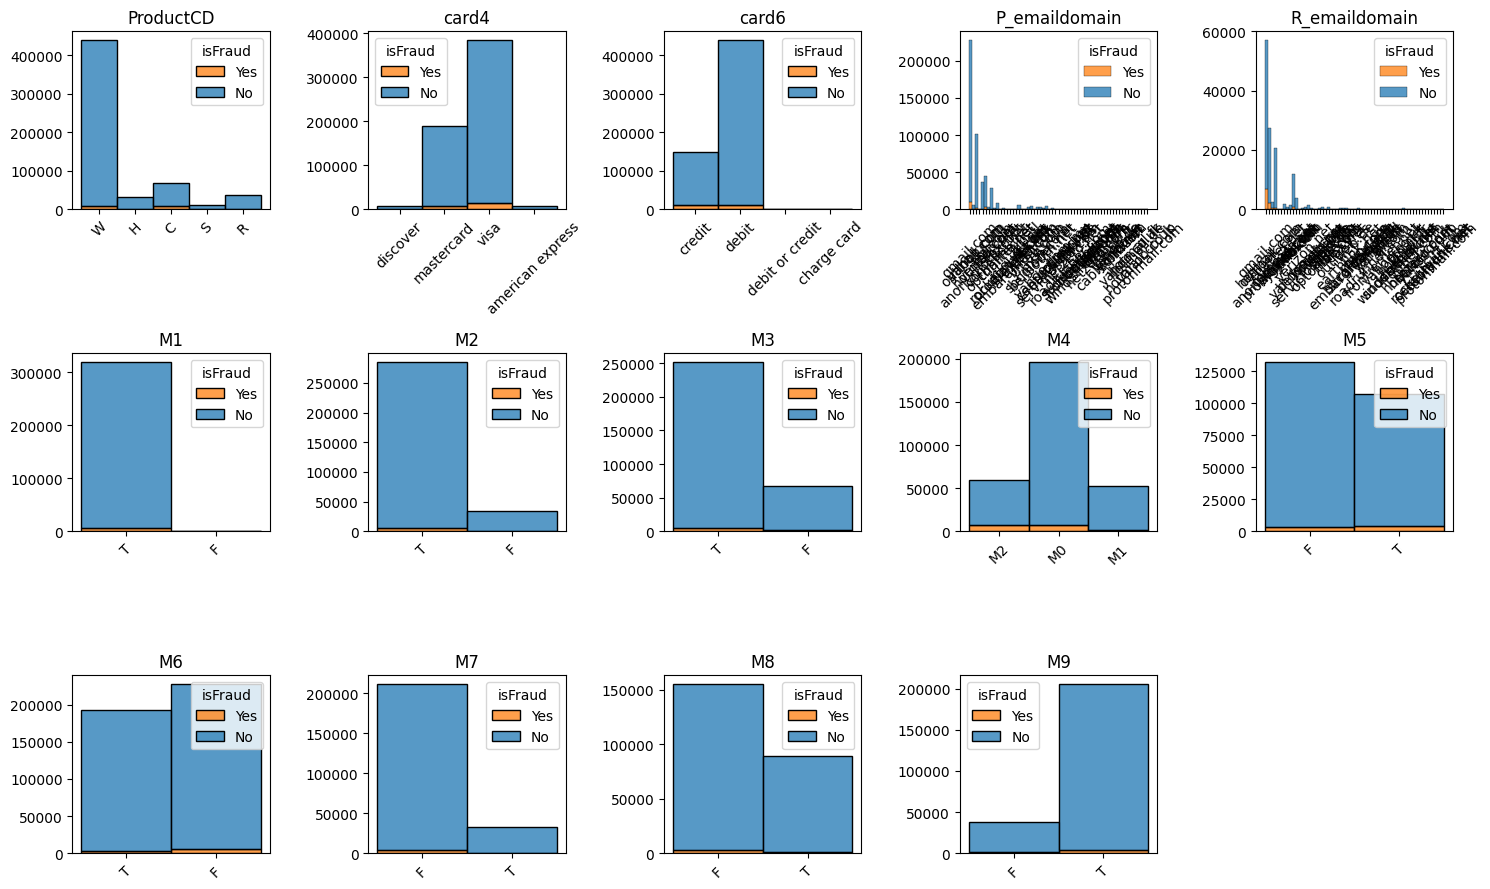

In [50]:
# Distribution of categorical features grouped by isFraud 
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.histplot(data=transaction, x=col, hue = 'isFraud', ax=axes[i], multiple='stack')
    axes[i].legend(title="isFraud", labels=["Yes", "No"])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='x', rotation=45) 

# Turn off remaining axes
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j]) 

plt.tight_layout()
plt.show()

#### <span style="color:green; font-weight:bold;"> Insigts: </span>

- The boxplots reveal that nearly all numerical features exhibit numerous outliers, with the exception of card1, card2, card5, D2, D9, and D11.

- Histograms of the categorical features show that fraudulent transactions are present across most of the unique labels.

- A similar pattern is observed in some numerical features, such as D9.


### Utility Functions to Analyze Corrrelations

In [168]:
# Utility functions to analyze and visualize feature corrrelations, and 
# identify highly correlated features to dop 
def get_redundant_corr_pairs(df):
    """Return set of redundant correlation pairs (diagonal and lower triangle)."""
    cols = df.columns
    return {(cols[i], cols[j]) for i in range(len(cols)) for j in range(i + 1)}

def get_high_correlations(corr_matrix, threshold):
    """Return top absolute correlations above a given threshold."""
    abs_corr = corr_matrix.abs().unstack()
    redundant_pairs = get_redundant_corr_pairs(corr_matrix)
    filtered = abs_corr.drop(labels=redundant_pairs).sort_values(ascending=False)
    return filtered[filtered > threshold]

def plot_correlation_heatmap(df, columns, figsize):
    """Plot correlation heatmap for a given set of columns."""
    corr_matrix = df[columns].corr()
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    return corr_matrix

def get_columns_to_drop(corr_matrix, threshold):
    """Identify columns with correlations above the threshold."""
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    return [col for col in upper_triangle.columns if any(upper_triangle[col] > threshold)]

def analyze_correlation_and_prune(df, columns, threshold=0.65, figsize=(15, 15)):
    """Main function to analyze correlation and determine columns to drop."""
    corr_matrix = plot_correlation_heatmap(df, columns, figsize)
    high_related = get_high_correlations(corr_matrix, threshold)
    columns_to_drop = get_columns_to_drop(corr_matrix, threshold)
    return high_related, corr_matrix, columns_to_drop

def summarize_correlation_results(group_name, group_cols, dropped_cols):
    """Summarizes the results of a correlation-based column pruning operation."""
    kept_cols = list(set(group_cols) - set(dropped_cols))
    
    summary_dict = {
        'Group': group_name,
        'Total Columns': len(group_cols),
        'Columns': group_cols,
        'Dropped Columns': dropped_cols,
        'Num Dropped': len(dropped_cols),
        'Kept Columns': kept_cols,
        'Num Kept': len(kept_cols)
    }
    
    summary_df = pd.DataFrame([{
        'Group': group_name,
        'Total Columns': len(group_cols),
        'Num Dropped': len(dropped_cols),
        'Dropped Columns': dropped_cols,
        'Num Kept': len(kept_cols),
        'Kept Columns': kept_cols
    }])    
    return summary_dict, summary_df

CORR_THRESH = 0.6

### Exploratory Data Analysis - C-Columns

In [171]:
# C-column names
c_cols = {'C-columns': [f'C{i}' for i in range(1, 15)]}

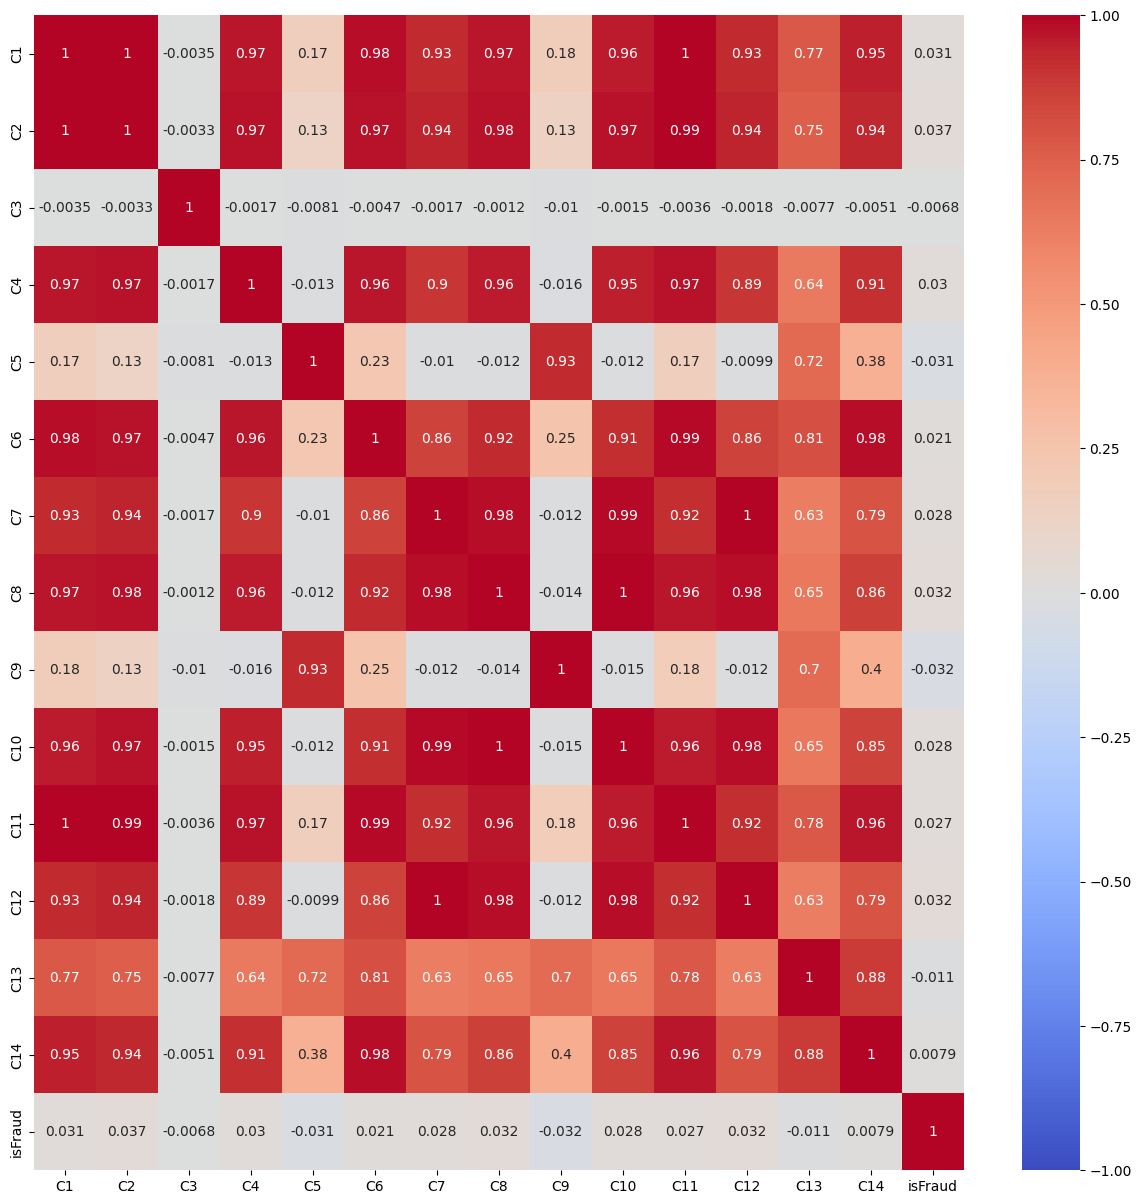

In [175]:
# Analyze the correlation within C-columns and the isFraud label
c_high_related, c_corr_matrix, c_cols_to_drop = analyze_correlation_and_prune(
    transaction, c_cols['C-columns'] + ['isFraud'], threshold=CORR_THRESH
)

In [ ]:
# C-columns to drop and keep
c_result, c_result_df = summarize_correlation_results('C-columns', c_cols['C-columns'], c_cols_to_drop)
c_result_df

,Group,Total Columns,Num Dropped,Dropped Columns,Num Kept,Kept Columns
0,C-columns,14,11,"[C2, C4, C6, C7, C8, C9, C10, C11, C12, C13, C14]",3,"[C5, C1, C3]"


### Exploratory Data Analysis - D-Columns

In [177]:
# D-column names
d_cols = {'D-columns': [f'D{i}' for i in range(1, 16)]}

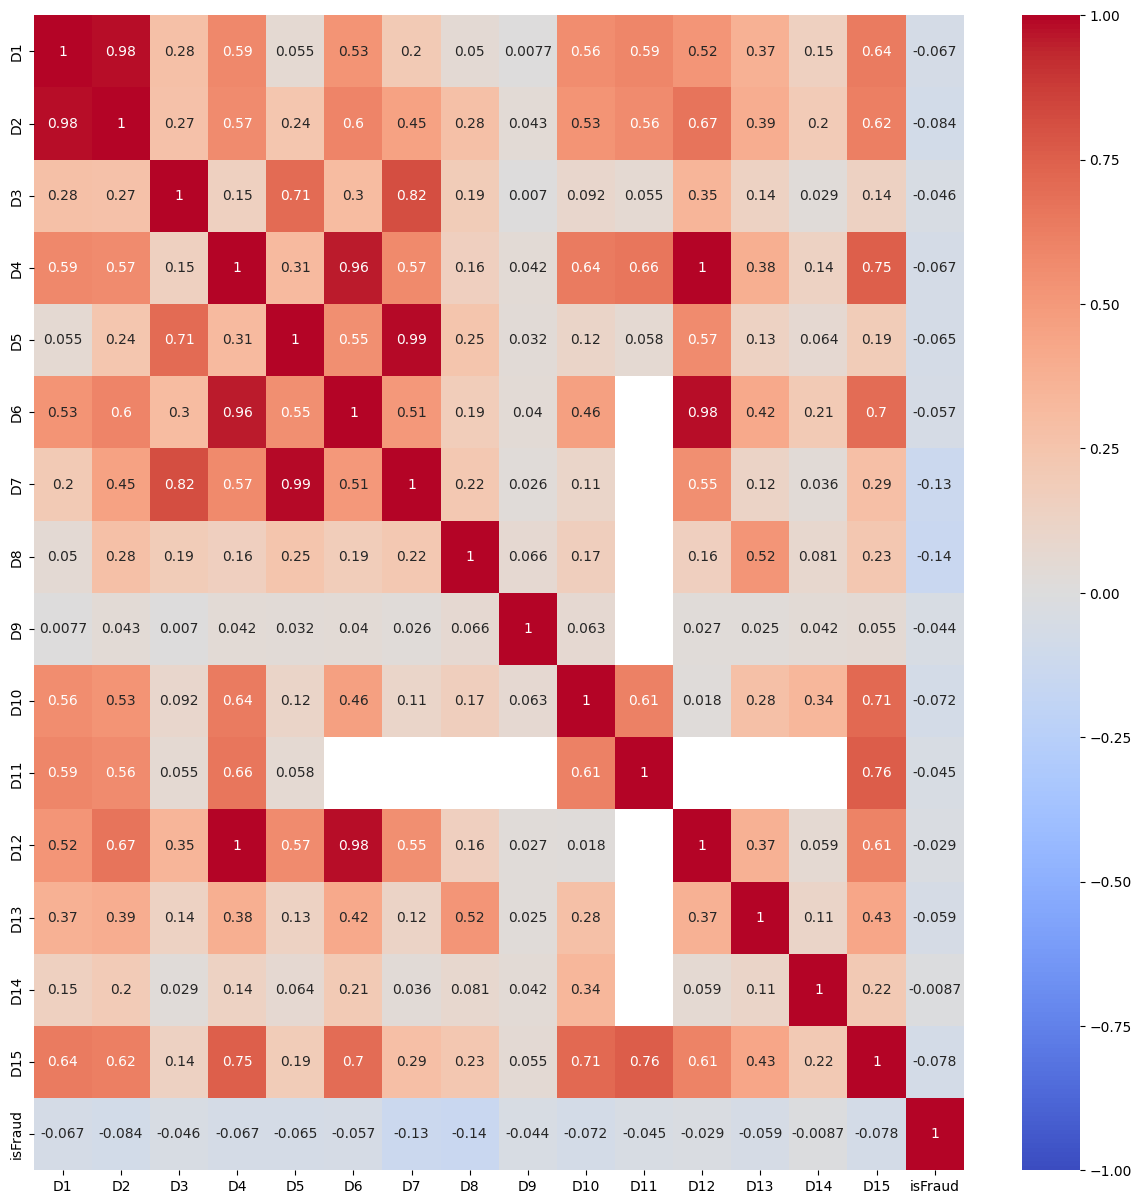

In [178]:
# Analyze the correlation within D-columns and the isFraud label
d_high_related, d_corr_matrix, d_cols_to_drop = analyze_correlation_and_prune(
    transaction, d_cols['D-columns'] + ['isFraud'], threshold=CORR_THRESH
)

In [179]:
# D-columns to drop and keep
d_result, d_result_df = summarize_correlation_results('D-columns', d_cols['D-columns'], d_cols_to_drop)
d_result_df

,Group,Total Columns,Num Dropped,Dropped Columns,Num Kept,Kept Columns
0,D-columns,15,8,"[D2, D5, D6, D7, D10, D11, D12, D15]",7,"[D1, D8, D13, D14, D9, D4, D3]"


### Exploratory Data Analysis - M-Columns (Categorical)

In [180]:
# M-column names
m_cols = {'M-columns': [f'M{i}' for i in range(1, 10)]}

In [184]:
# Encode M-columns
label_map = {'F': 0, 'T': 1, 'M0': 0, 'M1': 1, 'M2': 2}
for col in m_cols['M-columns']: 
  transaction[col] = transaction[col].map(label_map)

In [185]:
# View encoded M-columns
transaction[m_cols['M-columns']]

,M1,M2,M3,M4,M5,M6,M7,M8,M9
0,1.0,1.0,1.0,2.0,0.0,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,0.0,1.0,1.0,NaN,NaN,NaN
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,0.0,1.0,0.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
590535,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
590536,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
590537,1.0,0.0,0.0,NaN,NaN,1.0,NaN,NaN,NaN
590538,1.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN


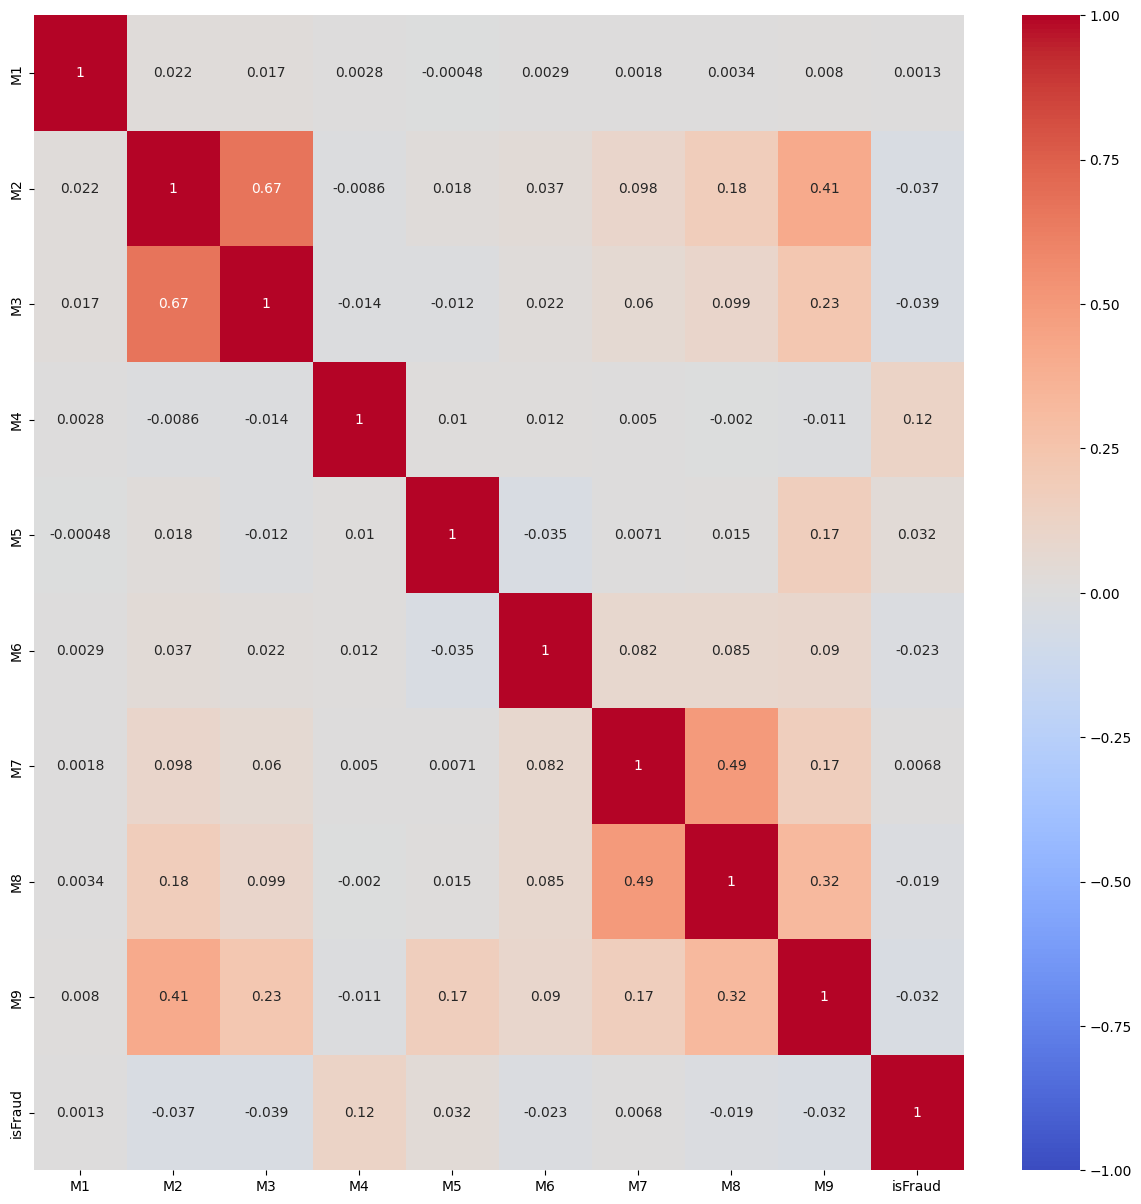

In [186]:
# Analyze the correlation within M-columns and the isFraud label
m_high_related, m_corr_matrix, m_cols_to_drop = analyze_correlation_and_prune(
    transaction, m_cols['M-columns'] + ['isFraud'], threshold=CORR_THRESH
)

In [187]:
# M-columns to drop and keep
m_result, m_result_df = summarize_correlation_results('M-columns', m_cols['M-columns'], m_cols_to_drop)
m_result_df

,Group,Total Columns,Num Dropped,Dropped Columns,Num Kept,Kept Columns
0,M-columns,9,1,[M3],8,"[M4, M2, M8, M6, M7, M9, M1, M5]"


### Exploratory Data Analysis - V-Columns

In [157]:
# dataframe with only V columns
df_v = transaction.iloc[:, 55:394]
df_v.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
# testing purpose only, to be removed
sample_v = df_v.sample(frac=0.0001, random_state=42)

In [ ]:
# V-column names
v_cols = [f'V{i}' for i in range(1, 340)]

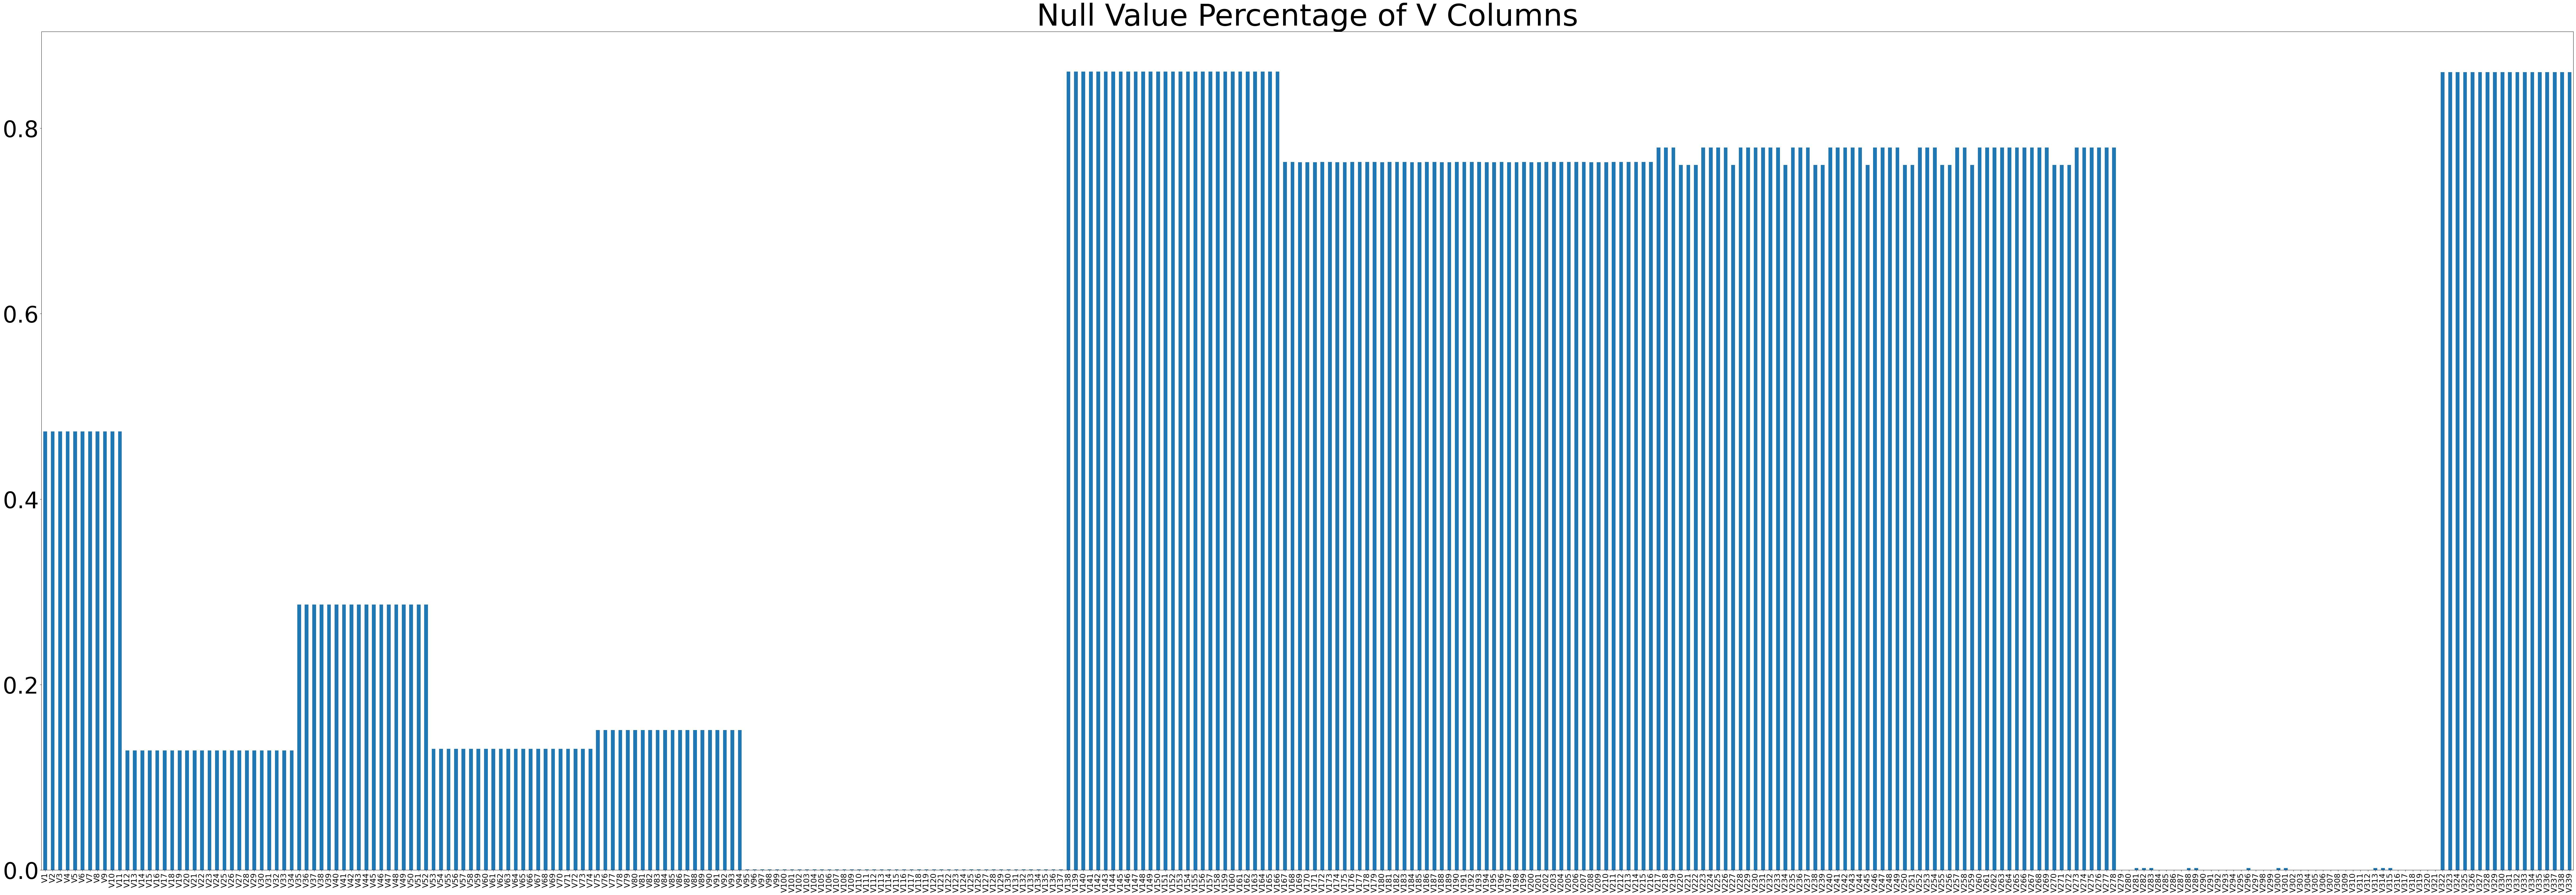

In [160]:
percent_null = df_v.isna().sum()/df_v.shape[0]
plt.figure(figsize=(120,40))
percent_null[v_cols].plot(kind='bar')
plt.title("Null Value Percentage of V Columns", fontsize=80)
plt.xticks(fontsize=20)
plt.yticks(fontsize=60)
plt.show()

In [161]:
# Group V columns based on the null value percentages
v_ranges = {
    'group1': (1, 12),
    'group2': (12, 35),
    'group3': (35, 53),
    'group4': (53, 75),
    'group5': (75, 95),
    'group6': (95, 138),
    'group7': (138, 167),
    'group8': (167, 217),
    'group9': (217, 279),
    'group10': (279, 322),
    'group11': (322, 340),
}

v_groups = {k: [f'V{i}' for i in range(start, end)] for k, (start, end) in v_ranges.items()}

In [162]:
# Plot V-column null value percentages bt groups 
fig, axes = plt.subplots(3, 4, figsize = (120,60))
axes =axes.flatten()

for name, ax in zip(v_groups.keys(), axes):
  percent_null[v_groups[name]].plot(ax=ax, kind='bar')
  ax.tick_params(axis='both', which='major', labelsize=40)

# Turn off remaining axes
for j in range(len(v_groups.keys()), len(axes)):
    fig.delaxes(axes[j]) 

fig.tight_layout()
fig.suptitle('V-columns Groups', y=1.1, fontsize=100)
fig.subplots_adjust(top=1.08)
fig.show()

In [163]:
df2=transaction.sample(frac=0.01)

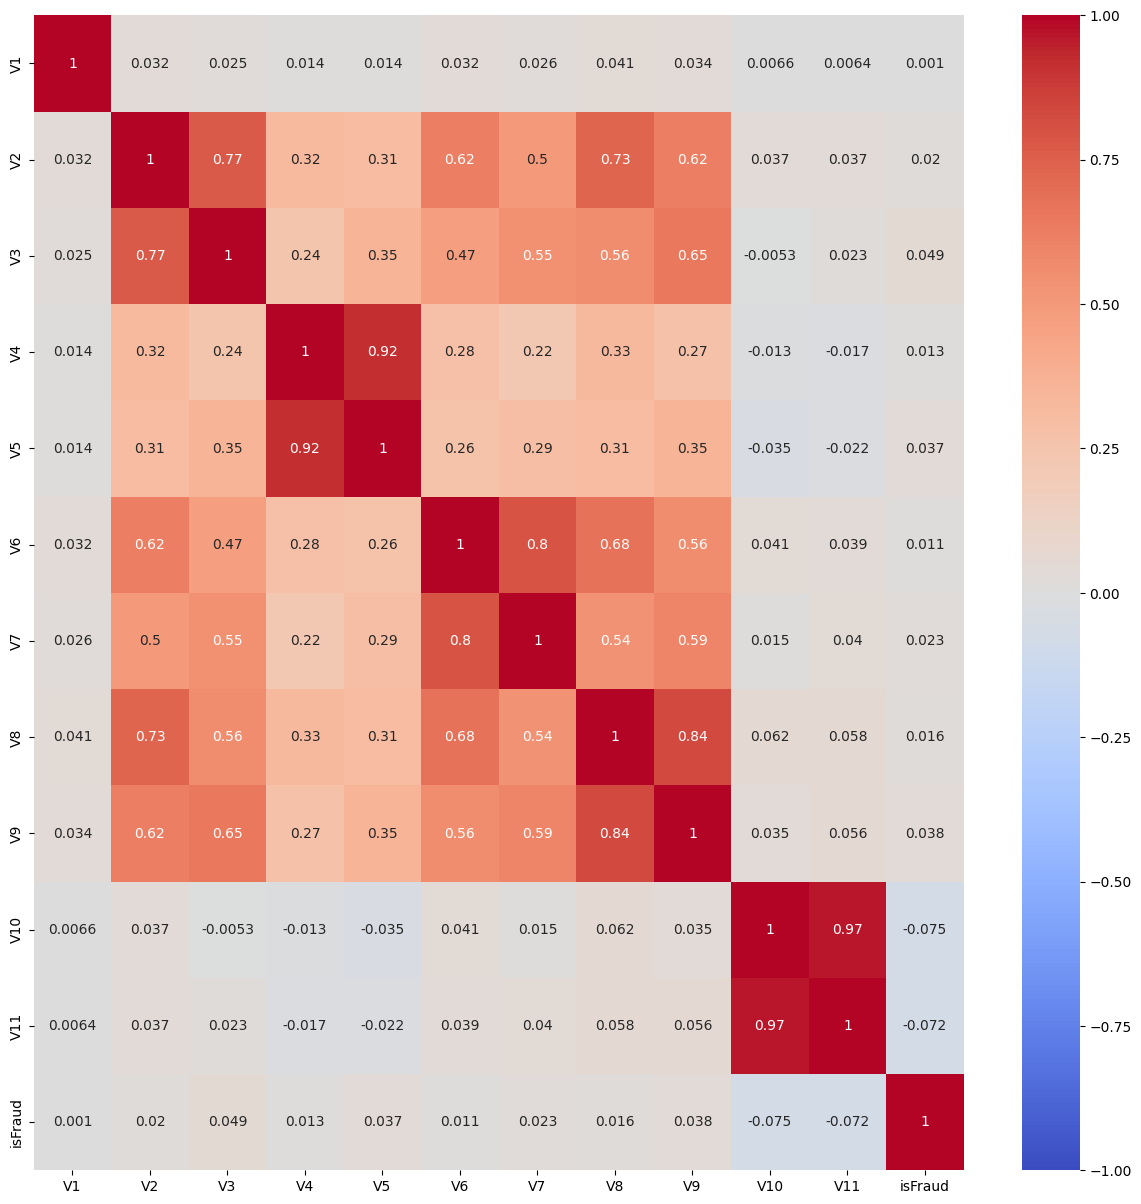

In [ ]:
# Analyze the correlation within group1 of the V-columns and the isFraud label
group1_high_related, group1_corr_matrix, group1_cols_to_drop = analyze_correlation_and_prune(
    transaction, v_groups['group1'] + ['isFraud'], threshold=CORR_THRESH
)

In [165]:
v_group1_result, v_grp1_result_df = summarize_correlation_results('group1', v_groups['group1'], group1_cols_to_drop)
v_grp1_result_df

,Group,Total Columns,Num Dropped,Dropped Columns,Num Kept,Kept Columns
0,group1,11,7,"[V3, V5, V6, V7, V8, V9, V11]",4,"[V1, V2, V10, V4]"
